In [44]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

In [45]:
X=np.load("./X.npy")
Y=np.load("./y.npy")
X=X[0:1000]
Y=Y[0:1000]

In [46]:
print(f"shape of features : {X.shape} \nshape of target : {Y.shape}")

shape of features : (1000, 400) 
shape of target : (1000, 1)


In [47]:
print(f"features : {X[1]} \n\n target first : {Y[0]} last : {Y[-1]} ")

features : [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.22856793e-04 -9.15576210e-04 -2.53532265e-02
 -3.85931128e-02 -3.84044678e-02 -1.93746688e-02  3.90933920e-04
  8.19371408e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+

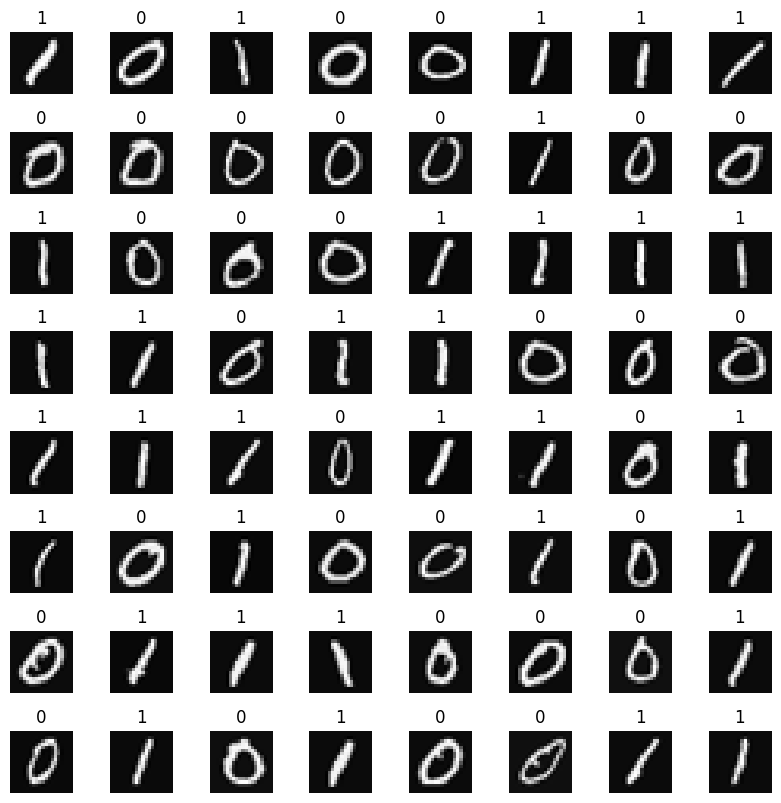

In [48]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T  #since its a 400 pixels which is 20x20
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(Y[random_index,0])
    ax.set_axis_off() 

Model

In [49]:
model=Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(units=25,activation='sigmoid',name='layer_1'),
    Dense(units=15,activation='sigmoid',name='layer_2'),
    Dense(units=1,activation='sigmoid',name='layer_3'),
])

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 25)                10025     
                                                                 
 layer_2 (Dense)             (None, 15)                390       
                                                                 
 layer_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
[layer_1,layer_2,layer_3]=model.layers
W1,b1=layer_1.get_weights()
W2,b2=layer_2.get_weights()
W3,b3=layer_3.get_weights()
print(f"Weight and bias of layer_1 : {W1.shape} , {b1.shape}")
print(f"Weight and bias of layer_2 : {W2.shape} , {b2.shape}")
print(f"Weight and bias of layer_3 : {W3.shape} , {b3.shape}")

Weight and bias of layer_1 : (400, 25) , (25,)
Weight and bias of layer_2 : (25, 15) , (15,)
Weight and bias of layer_3 : (15, 1) , (1,)


In [52]:
model.compile(loss=BinaryCrossentropy())
model.fit(X,Y,epochs=40)


Epoch 1/40

32/32 [==============================] - 1s 2ms/step - loss: 0.6055
Epoch 2/40
32/32 [==============================] - 0s 2ms/step - loss: 0.4396
Epoch 3/40
32/32 [==============================] - 0s 2ms/step - loss: 0.3051
Epoch 4/40
32/32 [==============================] - 0s 1ms/step - loss: 0.2109
Epoch 5/40
32/32 [==============================] - 0s 2ms/step - loss: 0.1480
Epoch 6/40
32/32 [==============================] - 0s 1ms/step - loss: 0.1072
Epoch 7/40
32/32 [==============================] - 0s 2ms/step - loss: 0.0791
Epoch 8/40
32/32 [==============================] - 0s 2ms/step - loss: 0.0596
Epoch 9/40
32/32 [==============================] - 0s 2ms/step - loss: 0.0461
Epoch 10/40
32/32 [==============================] - 0s 2ms/step - loss: 0.0365
Epoch 11/40
32/32 [==============================] - 0s 2ms/step - loss: 0.0295
Epoch 12/40
32/32 [==============================] - 0s 2ms/step - loss: 0.0243
Epoch 13/40
32/32 [============================

In [53]:
[layer_1,layer_2,layer_3]=model.layers
W1,b1=layer_1.get_weights()
W2,b2=layer_2.get_weights()
W3,b3=layer_3.get_weights()
print(f"Weight and bias of layer_1 : {W1[0]} , {b1[0]}")
print(f"Weight and bias of layer_2 : {W2[0]} , {b2[0]}")
print(f"Weight and bias of layer_3 : {W3[0]} , {b3[0]}")

Weight and bias of layer_1 : [ 0.07173289 -0.06123005 -0.00414296 -0.01901798  0.1143439   0.08830781
  0.01142694 -0.09117617 -0.05080074 -0.05125431  0.00341314  0.06603068
 -0.11863898 -0.01786301 -0.06416798 -0.02001347 -0.07090092  0.10218301
 -0.08853966  0.06567281 -0.06649102  0.07911889 -0.04557541 -0.01372395
 -0.10004357] , 0.14844803512096405
Weight and bias of layer_2 : [ 0.42699665  0.11184001  0.01329706 -0.5090377   0.32459253 -0.6200207
 -0.56115675 -0.4115685  -0.2719421   0.73549664 -0.5490704   0.01455786
 -0.46270803 -0.7308989  -0.10202104] , -0.01894528791308403
Weight and bias of layer_3 : [0.76643324] , 0.33917251229286194


1/1 [==============================] - 0s 27ms/step


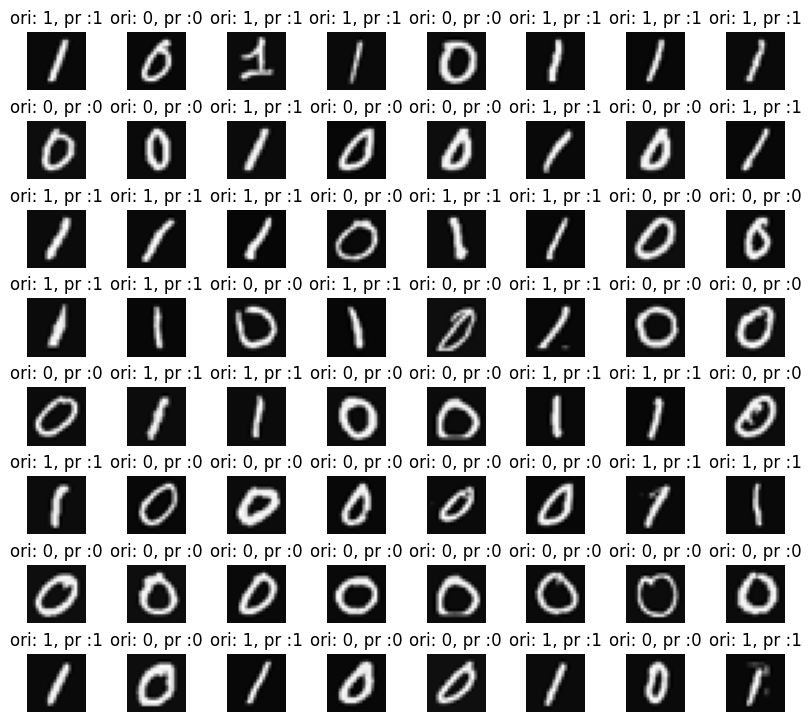

In [64]:
m,n=X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92])

for i,ax in enumerate(axes.flat):
    index=np.random.randint(m)
    X_resized=X[index].reshape((20,20)).T
    ax.imshow(X_resized,cmap='grey')

    predict=model.predict(X[index].reshape(1,400))
    if predict >=0.5:
        yhat=1
    else:
        yhat=0
    ax.set_title(f"ori: {Y[index,0]}, pr :{yhat}")



    ax.set_axis_off()